# Import

In [9]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Metrics

In [10]:
def eval_all(groundtruth_mask, pred_mask):
    precision = precision_score_(groundtruth_mask, pred_mask)
    recall = recall_score_(groundtruth_mask, pred_mask)
    acc = accuracy(groundtruth_mask, pred_mask)
    dice = dice_coef(groundtruth_mask, pred_mask)
    iou_score = iou(groundtruth_mask, pred_mask)
    return precision, recall, acc, dice, iou_score

def precision_score_(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_pixel_pred = np.sum(pred_mask)
    precision = np.mean(intersect/total_pixel_pred)
    return round(precision, 3)

def recall_score_(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_pixel_truth = np.sum(groundtruth_mask)
    recall = np.mean(intersect/total_pixel_truth)
    return round(recall, 3)

def accuracy(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    xor = np.sum(groundtruth_mask==pred_mask)
    acc = np.mean(xor/(union + xor - intersect))
    return round(acc, 3)

def dice_coef(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
    dice = np.mean(2*intersect/total_sum)
    return round(dice, 3) #round up to 3 decimal places

def iou(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    iou = np.mean(intersect/union)
    return round(iou, 3)

# Main

In [11]:
from crop_substance_spot import crop_substance_spot_ingredient, crop_substance_spot_mixture

def create_mask_ingredient(image):
    return crop_substance_spot_ingredient(image)

def create_mask_mixture(image):
    return crop_substance_spot_mixture(image)

In [12]:
def get_dir(folder_name):
    return os.path.join(os.getcwd(), folder_name)

def get_eval_dict():
    return {
        'precision': 0,
        'recall': 0,
        'accuracy': 0,
        'dice': 0,
        'iou': 0
    }
    
def check_name_match(name1, name2):
    if name1[:3] in ['5CY', 'LPY', 'NGG']:
        return name1[:6] == name2[:6]
    return name1[:4] == name2[:4]

def read_image(directory, name, in_gray=False):
    if in_gray:
        return cv2.imread(os.path.join(directory, name), cv2.IMREAD_GRAYSCALE)
    return cv2.imread(os.path.join(directory, name))

def apply_mask(image, mask):
    return cv2.bitwise_and(image, image, mask=mask)

def normalize_mask(mask):
    return mask / 255

def get_evaluation(groundtruth_mask, pred_mask):
    eval_dict = get_eval_dict()
    eval_dict['precision'], eval_dict['recall'], eval_dict['accuracy'], eval_dict['dice'], eval_dict['iou'] = eval_all(groundtruth_mask, pred_mask)
    return eval_dict

def update_total_eval(total_eval, eval_dict):
    for key in total_eval.keys():
        total_eval[key] += eval_dict[key]
    return total_eval

def calculate_average_from_total(total_eval, num_images):
    for key in total_eval.keys():
        total_eval[key] = round(total_eval[key] / num_images, 3)
    return total_eval

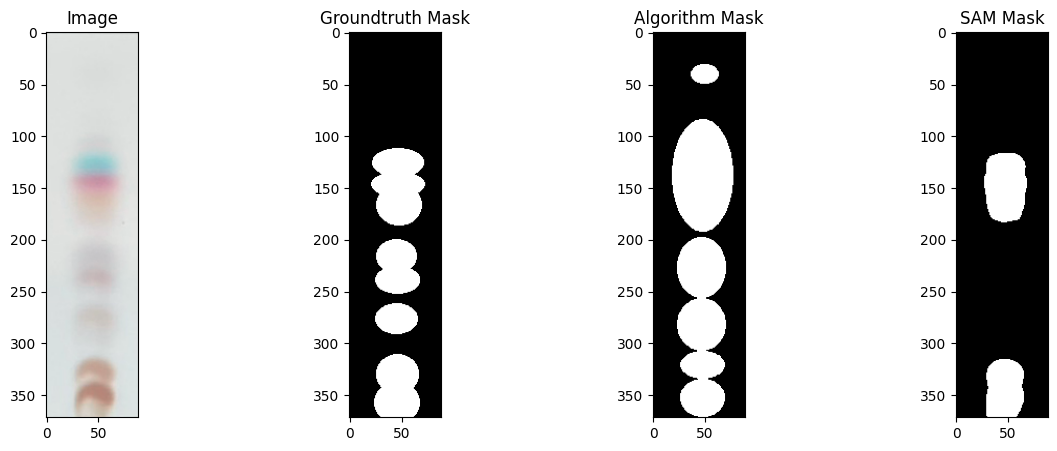

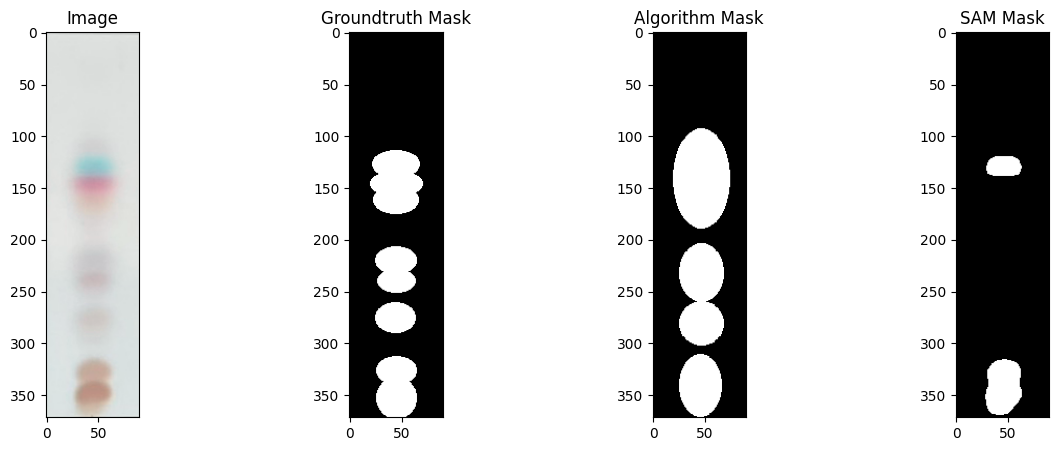

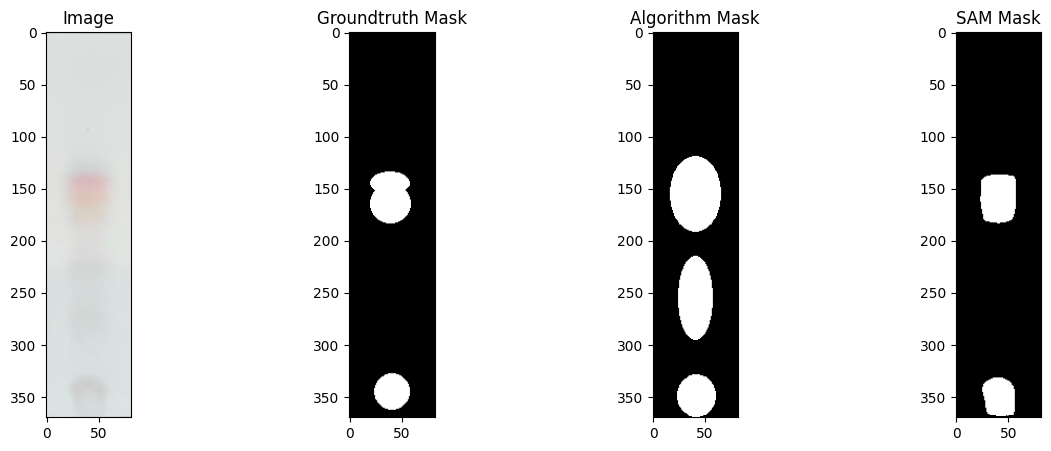

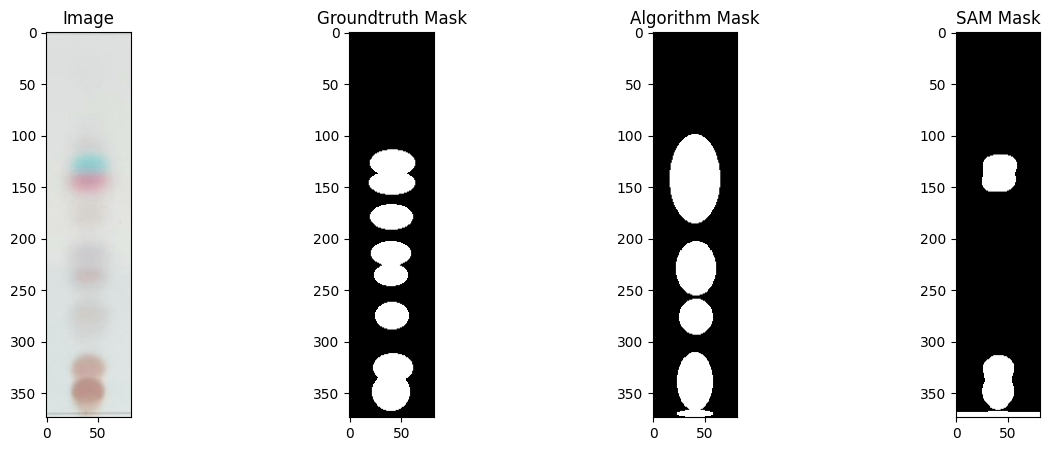

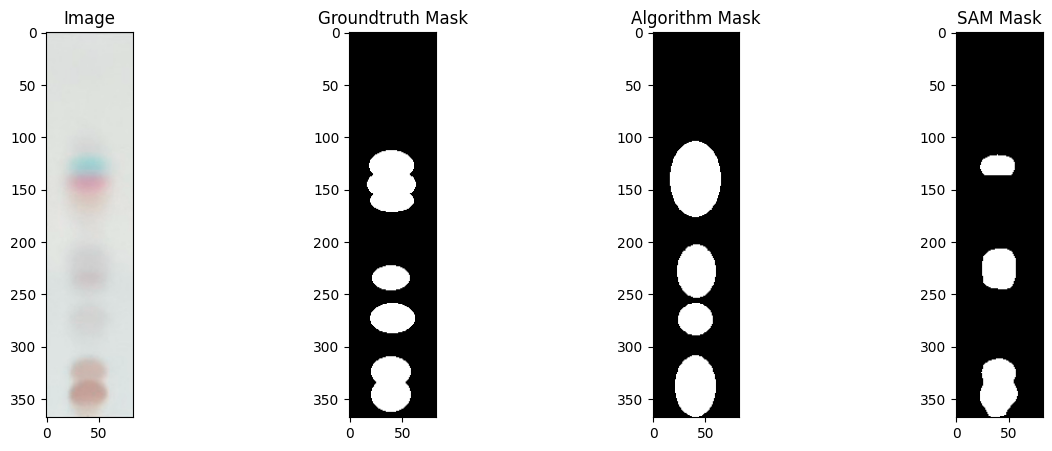

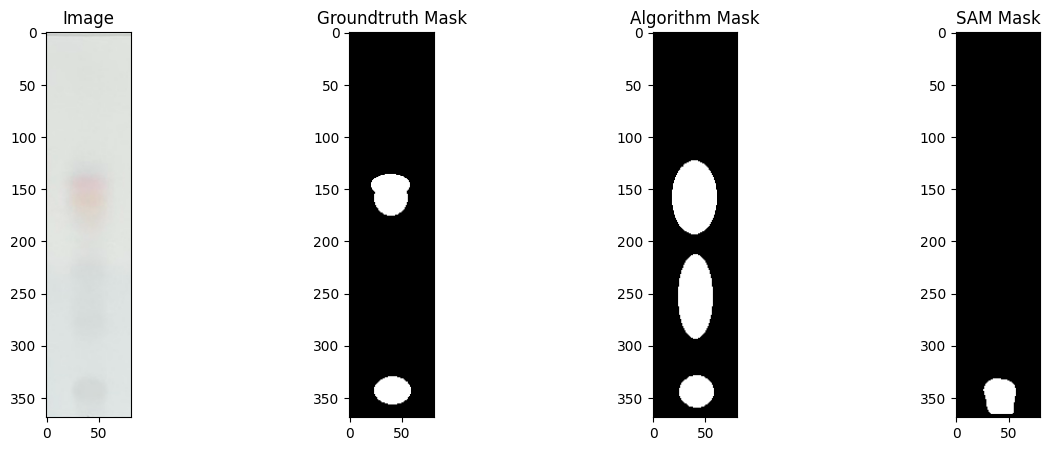

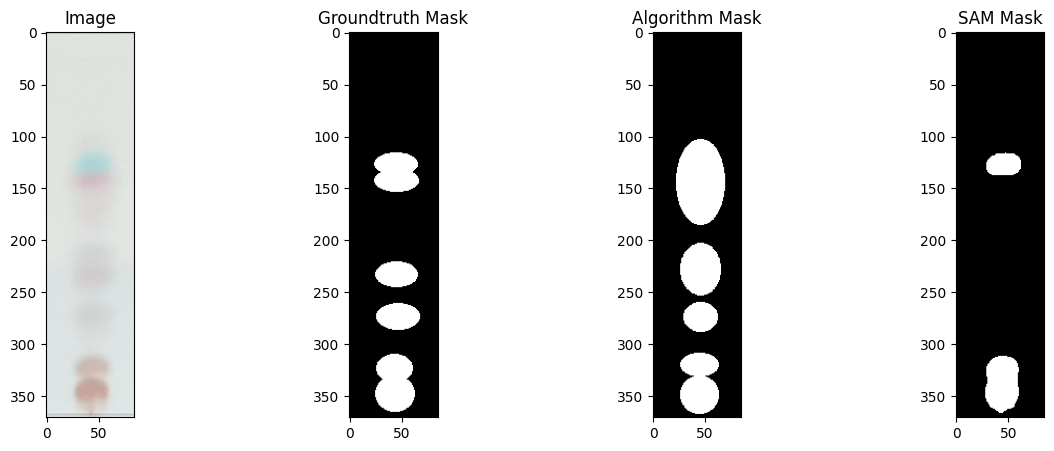

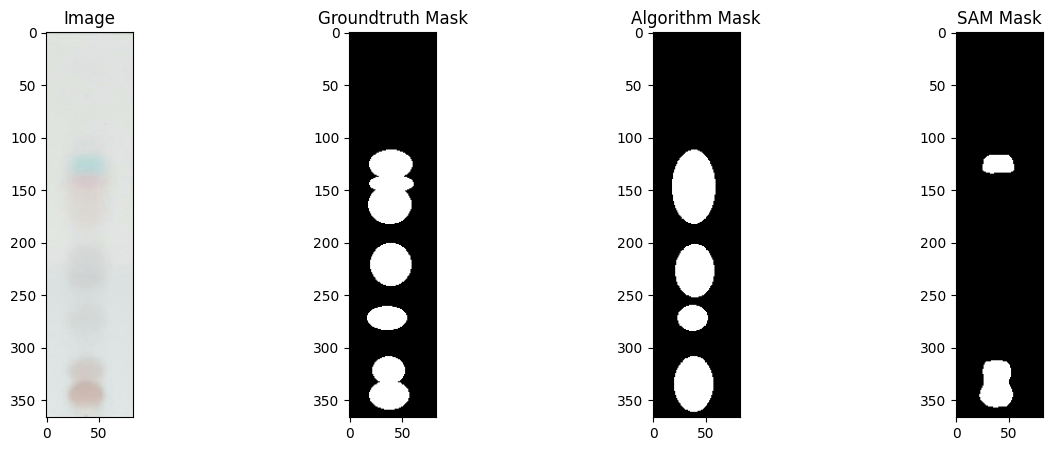

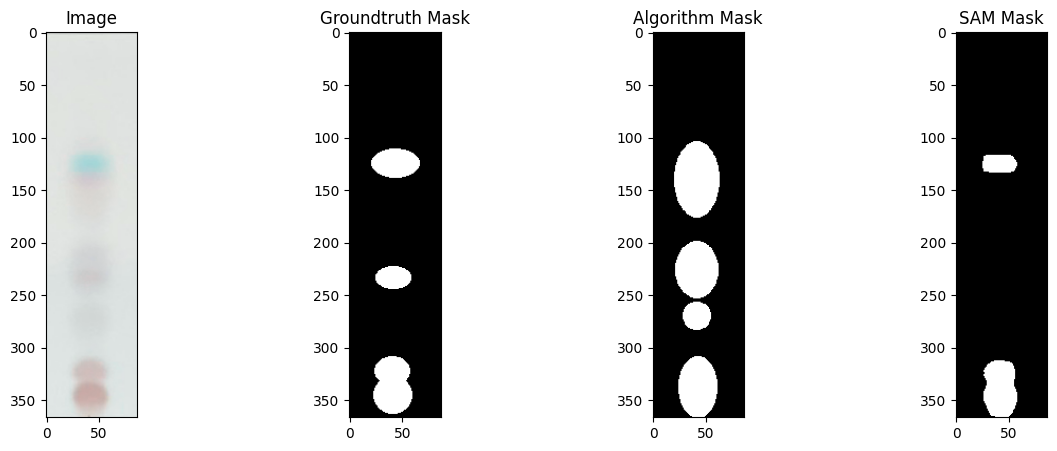

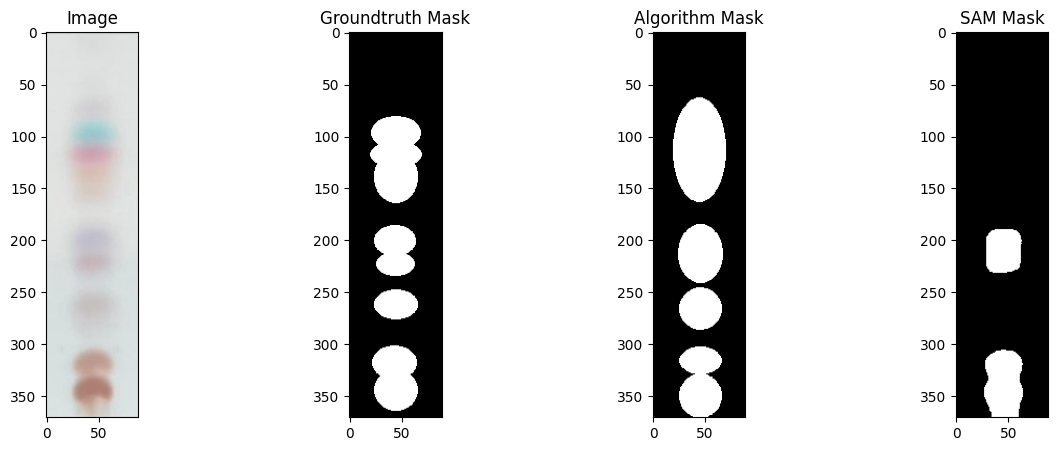

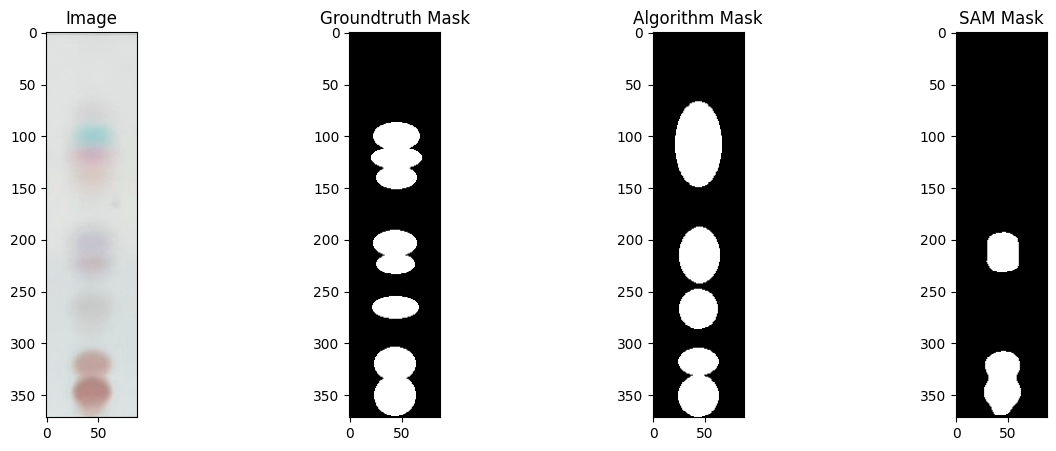

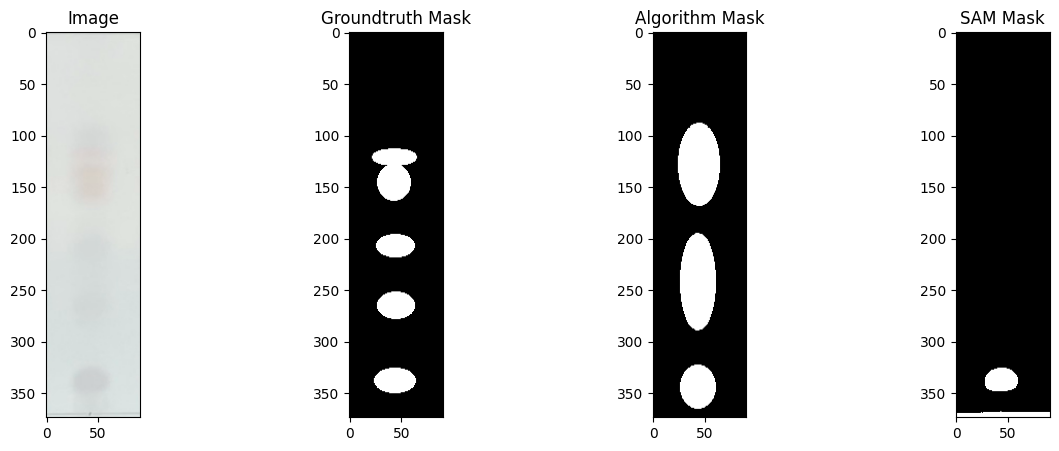

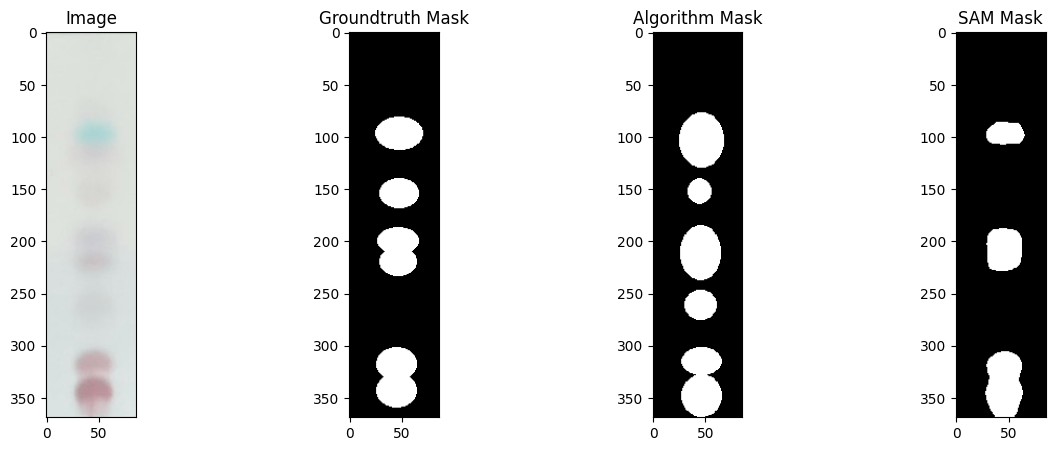

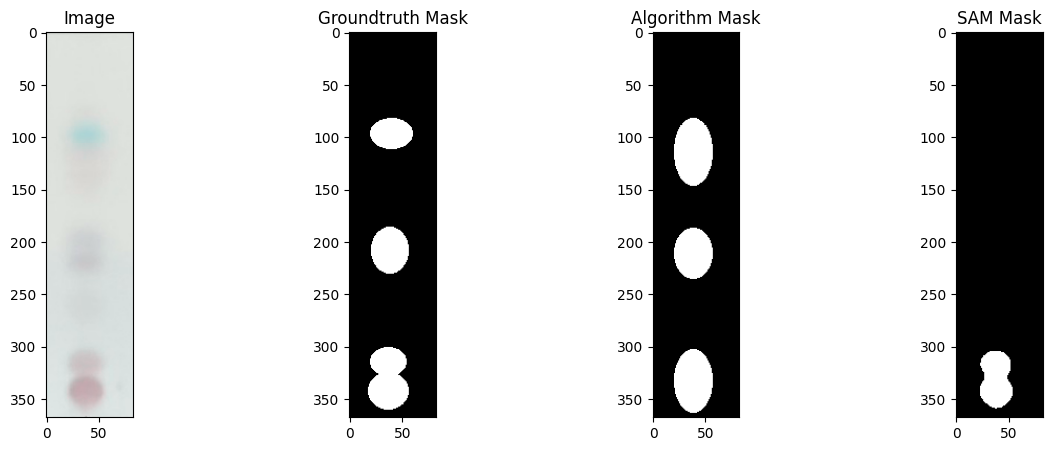

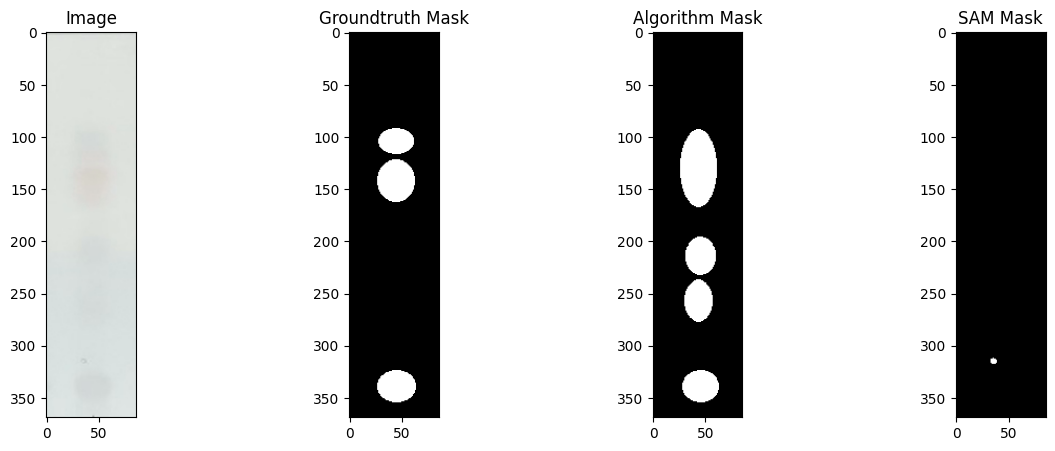

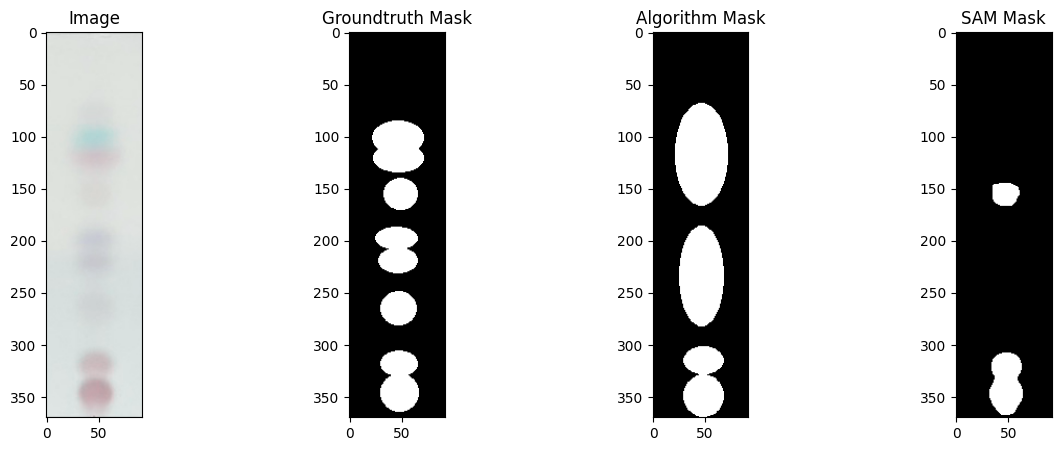

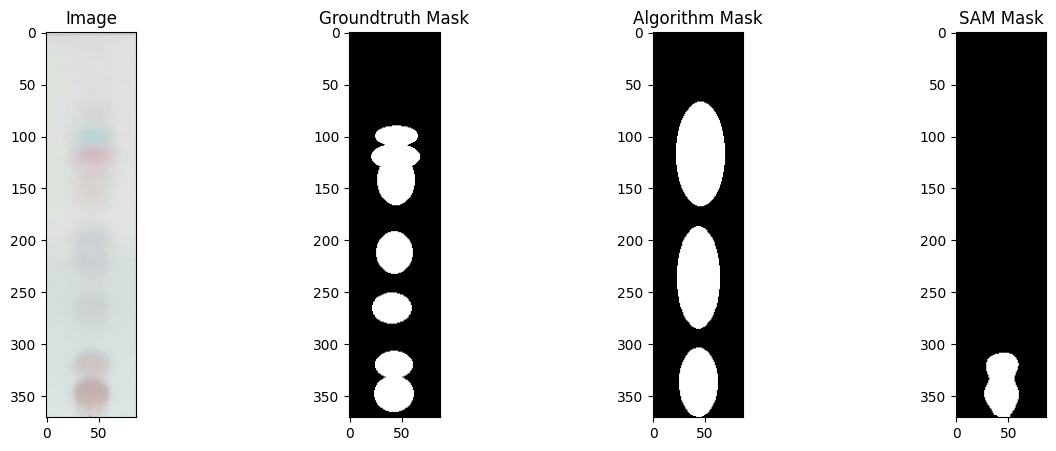

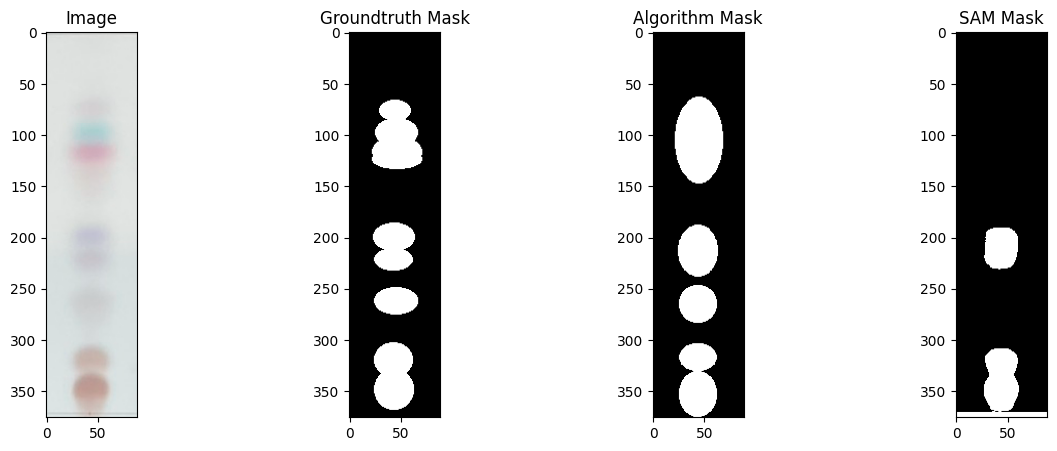

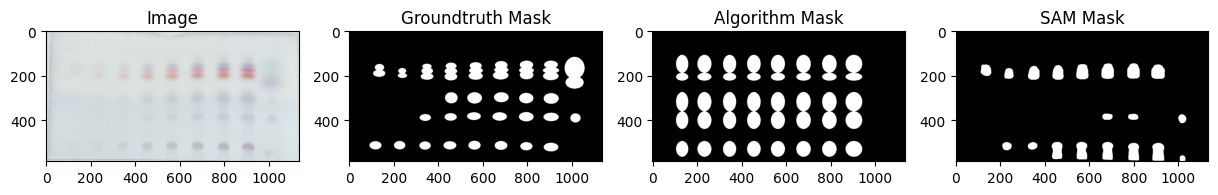

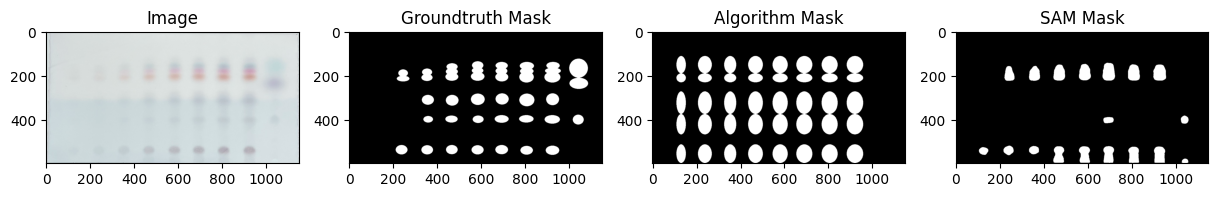

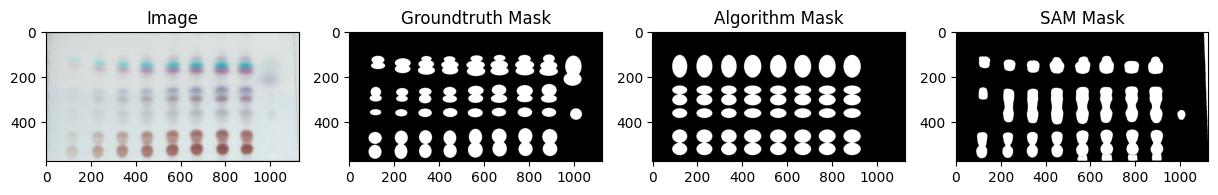

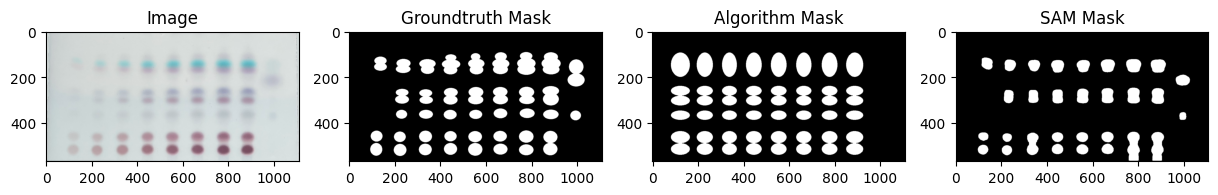

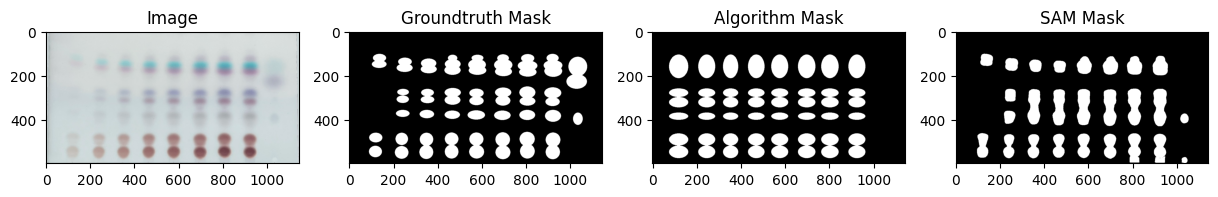

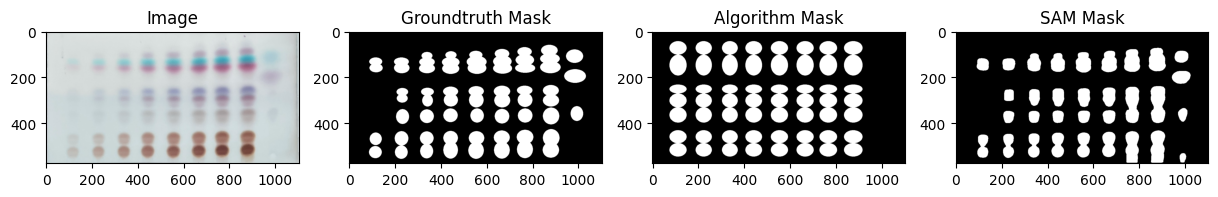

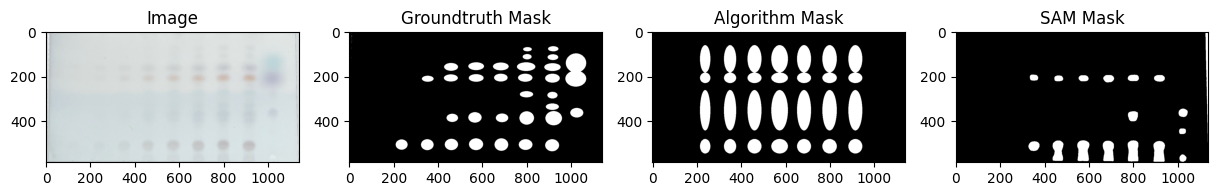

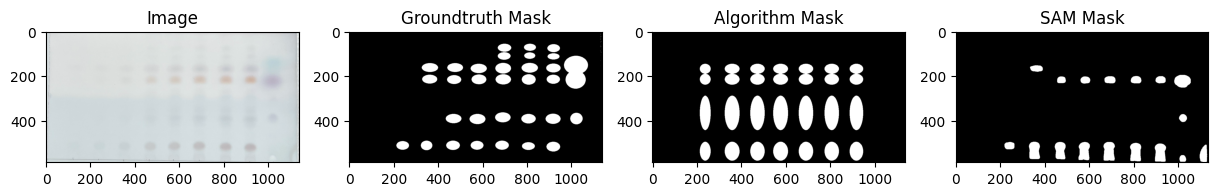

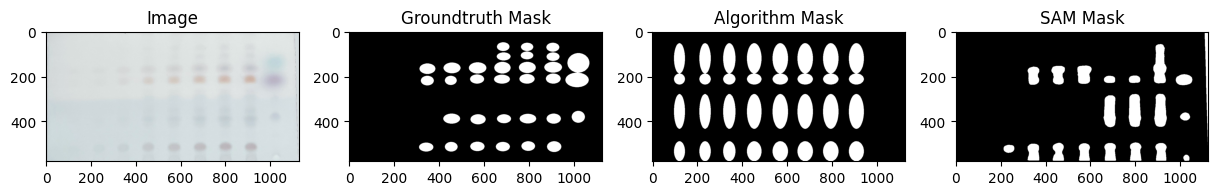


Evaluation Results DataFrame:


,image_name,SAM_precision,SAM_recall,SAM_accuracy,SAM_dice,SAM_iou,ALGOR_precision,ALGOR_recall,ALGOR_accuracy,ALGOR_dice,ALGOR_iou
0,1-M1.png,0.996,0.512,0.880,0.676,0.511,0.663,0.957,0.871,0.783,0.643
1,1-M2.png,0.995,0.304,0.858,0.466,0.304,0.695,0.968,0.907,0.809,0.679
2,1-M3.png,0.904,0.854,0.980,0.878,0.783,0.413,0.990,0.881,0.583,0.412
3,1-M4.png,0.849,0.389,0.862,0.534,0.364,0.718,0.879,0.905,0.790,0.654
4,1-M5.png,0.816,0.471,0.884,0.597,0.426,0.765,0.943,0.937,0.845,0.731
5,1-M6.png,0.709,0.330,0.949,0.450,0.291,0.352,0.988,0.884,0.519,0.351
6,1-M7.png,0.990,0.436,0.915,0.605,0.434,0.623,0.944,0.906,0.751,0.601
7,1-M8.png,0.991,0.273,0.860,0.429,0.273,0.882,0.885,0.955,0.884,0.791
8,1-M9.png,0.958,0.582,0.955,0.724,0.567,0.468,0.940,0.885,0.625,0.454
9,2-M1.png,0.921,0.384,0.843,0.542,0.371,0.796,0.944,0.928,0.864,0.760




Average Metrics:


SAM_precision      0.814630
SAM_recall         0.433667
SAM_accuracy       0.897222
SAM_dice           0.547889
SAM_iou            0.399519
ALGOR_precision    0.616444
ALGOR_recall       0.879444
ALGOR_accuracy     0.894889
ALGOR_dice         0.714037
ALGOR_iou          0.570815
dtype: float64

In [ ]:
input_dir = get_dir('Input')
groundtruth_dir = get_dir('Output - Groundtruth')
sam_dir = get_dir('Output - SAM')

input_names = os.listdir(input_dir)
groundtruth_names = os.listdir(groundtruth_dir)
groundtruth_names = [name for name in groundtruth_names if 'groundtruth' in name]
sam_names = os.listdir(sam_dir)

results_df = pd.DataFrame()

for input_name, groundtruth_name in zip(input_names, groundtruth_names):
    assert check_name_match(input_name, groundtruth_name)
    
    # READ IMAGE
    image = read_image(input_dir, input_name)
    
    # GET MASK
    if input_name[:3] in ['5CY', 'LPY', 'NGG']:
        mask_algor = create_mask_ingredient(image)
    else:
        mask_algor = create_mask_mixture(image)

    sam_name = [name for name in sam_names if check_name_match(input_name, name)][0]
    mask_sam = read_image(sam_dir, sam_name, in_gray=True)
    
    groundtruth_mask = read_image(groundtruth_dir, groundtruth_name, in_gray=True)
    
    # VISUALIZE
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[1].imshow(groundtruth_mask, cmap='gray')
    axes[1].set_title('Groundtruth Mask')
    axes[2].imshow(mask_algor, cmap='gray')
    axes[2].set_title('Algorithm Mask')
    axes[3].imshow(mask_sam, cmap='gray')
    axes[3].set_title('SAM Mask')
    plt.show()
    # output_folder = os.path.join(os.getcwd(), 'comparison')
    # output_name = f'{input_name[:-4]}_comparison.png'
    # fig.savefig(os.path.join(output_folder, output_name))
    
    # NORMALIZE MASKS
    mask_algor = normalize_mask(mask_algor)
    mask_sam = normalize_mask(mask_sam)
    groundtruth_mask = normalize_mask(groundtruth_mask)

    # EVALUATE
    eval_algor = get_evaluation(groundtruth_mask, mask_algor)
    eval_sam = get_evaluation(groundtruth_mask, mask_sam)
    
    row_data = {'image_name': input_name}
    for metric, value in eval_sam.items():
        row_data[f'SAM_{metric}'] = value
    for metric, value in eval_algor.items():
        row_data[f'ALGOR_{metric}'] = value
    
    results_df = pd.concat([results_df, pd.DataFrame([row_data])], ignore_index=True)

# After the loop, add this to display the DataFrame
print("\nEvaluation Results DataFrame:")
display(results_df)

# Calculate averages using pandas
print("\nAverage Metrics:")
display(results_df.drop('image_name', axis=1).mean())
